In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [210]:
df=pd.read_csv('/content/titanic (1).csv')

In [211]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Age', ylabel='Count'>

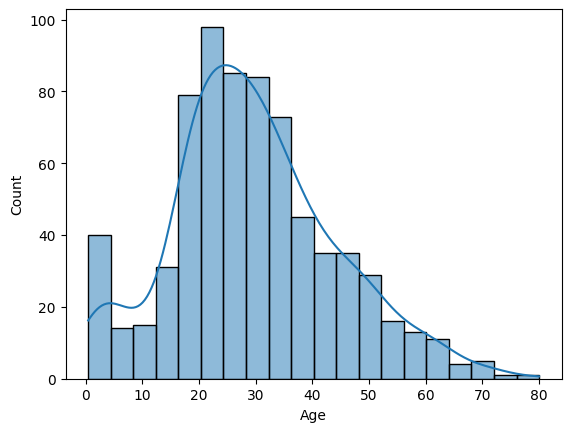

In [213]:
sns.histplot(df['Age'],kde=True)

In [214]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [215]:
df['Pclass']=df['Pclass'].astype(int)

In [216]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
feature=['Pclass', 'Age', 'SibSp','Parch','Fare']
# Fit the imputer and transform the data
imputed_data = imputer.fit_transform(df[feature])

In [217]:
imputed_data_df=pd.DataFrame(imputed_data ,columns=feature)

In [218]:
imputed_data_df.isna().sum()

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0


In [219]:
df['Age']=imputed_data_df['Age']

In [220]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [221]:
X=df[['Age','Fare']]
y=df['Survived']

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [223]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


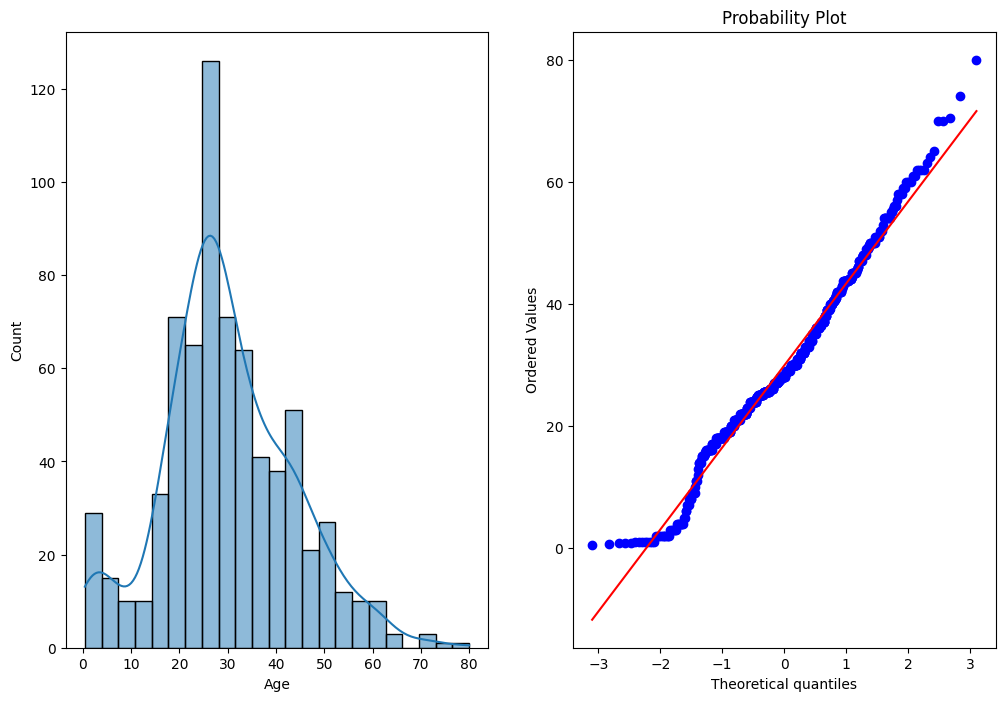

In [224]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.show()

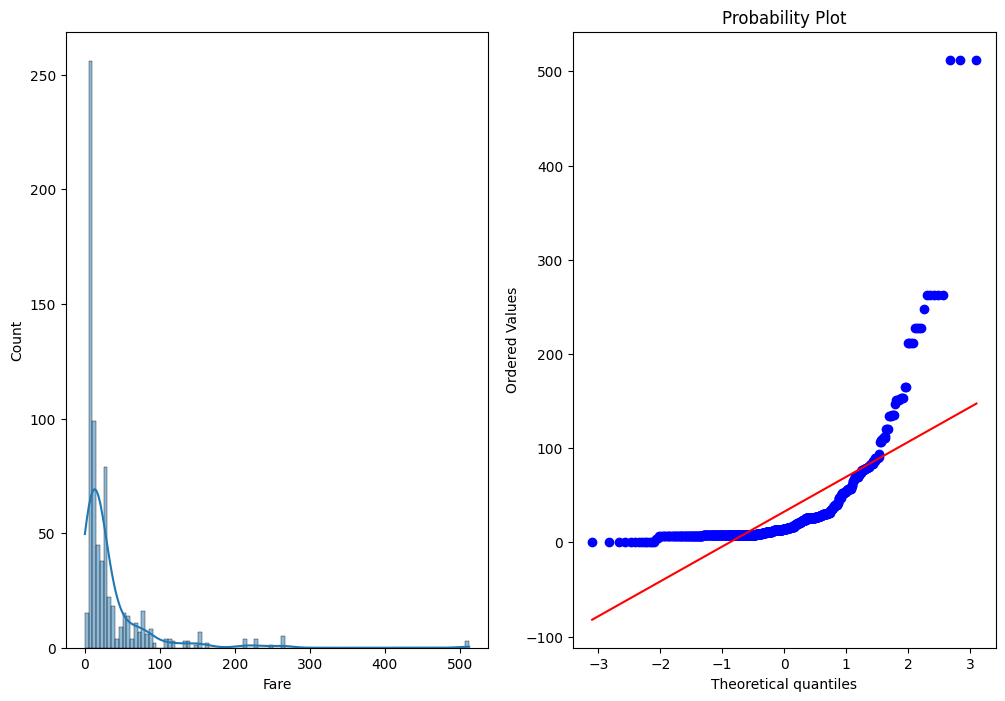

In [225]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.show()

In [226]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [227]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(clf,X,y,cv=kf)

In [228]:
print(f'Cross_validation_score of  Model:{np.mean(score)*100}')

Cross_validation_score of  Model:65.31428571428572


In [229]:
clf.fit(X_train,y_train)

LogisticRegression()

In [230]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(clf,X_train,y_train,cv=kf)

In [231]:
print(f'Cross_validation_score of  trainadatset:{np.mean(score)*100}')

Cross_validation_score of  trainadatset:66.61083743842364


In [232]:
pred_reg=clf.predict(X_test)

In [233]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,pred_reg)
print(f"Test score:{score*100}")

Test score:-45.135135135135144


In [234]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_reg))
print('Mean Squared Error:',mean_squared_error(y_test, pred_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_reg)))

Mean Absolute Error: 0.35195530726256985
Mean Squared Error: 0.35195530726256985
Root Mean Squared Error: 0.5932582129752355


In [235]:
d={'Actual_Age':y_test,'Predicted_Age':pred_reg}
df_predicted=pd.DataFrame(d)

In [236]:
df_predicted.head()

,Actual_Age,Predicted_Age
709,1,0
439,0,0
840,0,0
720,1,0
39,1,0


In [237]:
scores=accuracy_score(y_test,pred_reg)
scores

0.6480446927374302

#`After Transformation`

In [238]:
func=FunctionTransformer(func=np.log1p)
X_train_trans=func.fit_transform(X_train)

In [239]:
func=FunctionTransformer(func=np.log1p)
X_test_trans=func.transform(X_test)

In [240]:
clf.fit(X_train_trans,y_train)

LogisticRegression()

In [241]:
X_trans=func.fit_transform(X)

In [242]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(clf,X_trans,y,cv=kf)
print(f'Cross_validation_score of  model:{np.mean(score)*100}')

Cross_validation_score of  model:68.11428571428571


In [243]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(clf,X_train_trans,y_train,cv=kf)

In [244]:
print(f'Cross_validation_score of  traindataset:{np.mean(score)*100}')

Cross_validation_score of  traindataset:67.86699507389163


In [245]:
pred_reg=clf.predict(X_test_trans)

In [246]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,pred_reg)
print(f"Test score:{score*100}")

Test score:-31.31274131274131


In [247]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_reg))
print('Mean Squared Error:',mean_squared_error(y_test, pred_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_reg)))

Mean Absolute Error: 0.31843575418994413
Mean Squared Error: 0.31843575418994413
Root Mean Squared Error: 0.5643011201388353


In [248]:
scores=accuracy_score(y_test,pred_reg)

In [249]:
scores

0.6815642458100558

In [250]:
d={'Actual_Age':y_test,'Predicted_Age':pred_reg}
df1=pd.DataFrame(d)

In [251]:
df1.shape

(179, 2)

In [252]:
df1[df1['Actual_Age']==df1['Predicted_Age']]

,Actual_Age,Predicted_Age
439,0,0
840,0,0
720,1,1
290,1,1
333,0,0
...,...,...
363,0,0
97,1,1
852,0,0
433,0,0


In [253]:
(133/179)*100

74.30167597765363

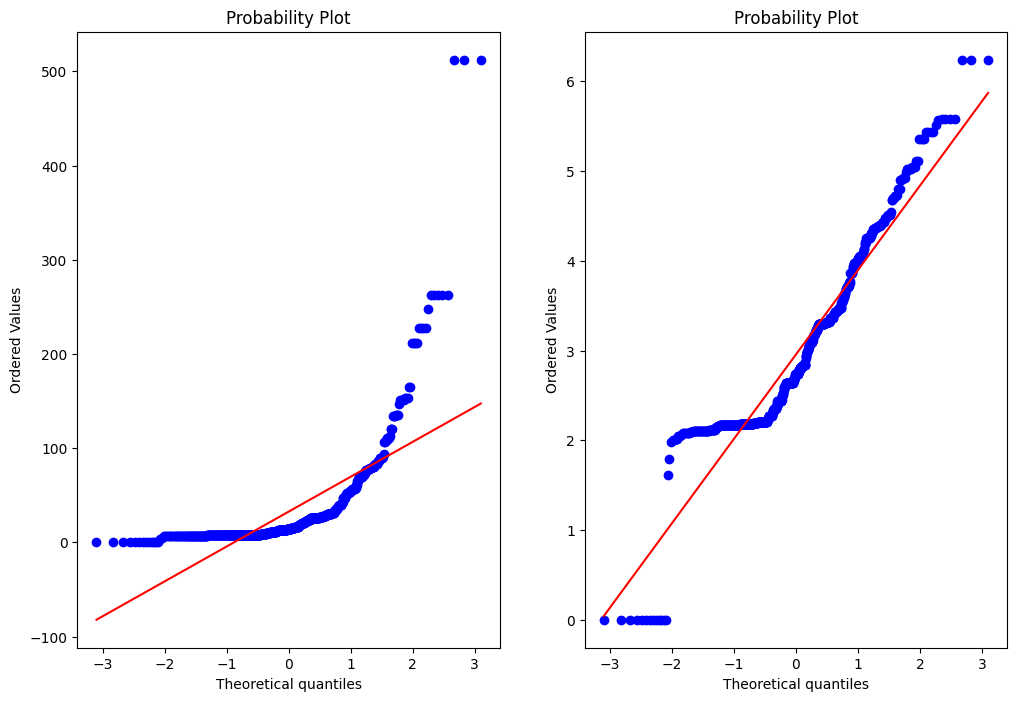

In [254]:
plt.figure(figsize=(12,8))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.subplot(122)
stats.probplot(X_train_trans['Fare'],dist='norm',plot=plt)
plt.show()

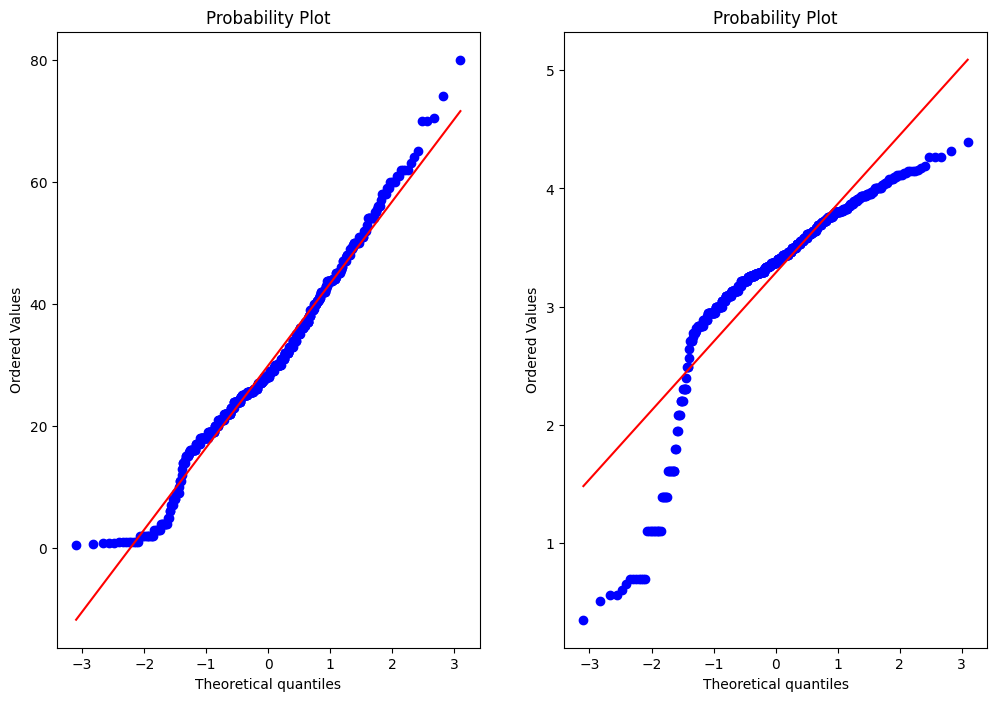

In [255]:
plt.figure(figsize=(12,8))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.subplot(122)
stats.probplot(X_train_trans['Age'],dist='norm',plot=plt)
plt.show()

In [256]:
func=ColumnTransformer([('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')

In [257]:
X_train_transformation=func.fit_transform(X_train)
X_test_transformation=func.transform(X_test)

In [258]:
clf.fit(X_train_transformation,y_train)

LogisticRegression()

In [259]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(clf,X_train_transformation,y_train,cv=kf)
print(f'Cross_validation_score of  model:{np.mean(score)*100}')

Cross_validation_score of  model:66.47290640394088


In [260]:
pred_reg=clf.predict(X_test_transformation)

In [261]:
d={'Actual_Age':y_test,'Predicted_Age':pred_reg}
df2=pd.DataFrame(d)

In [262]:
len(df2[df2['Actual_Age']==df2['Predicted_Age']])/len(df2)*100

68.71508379888269

#`all other transformation`

In [268]:
def apply_transform(transform):
    X = df[['Age','Fare']]
    y = df.iloc[:,1]

    trf = ColumnTransformer([('fare_transform',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.616167290886392


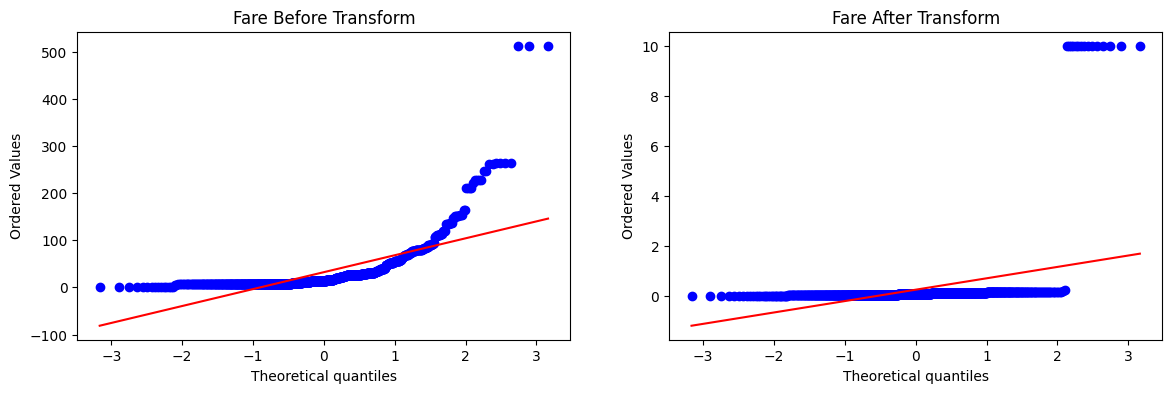

In [269]:
apply_transform(lambda x:1/(x+0.1))

Accuracy 0.6476154806491885


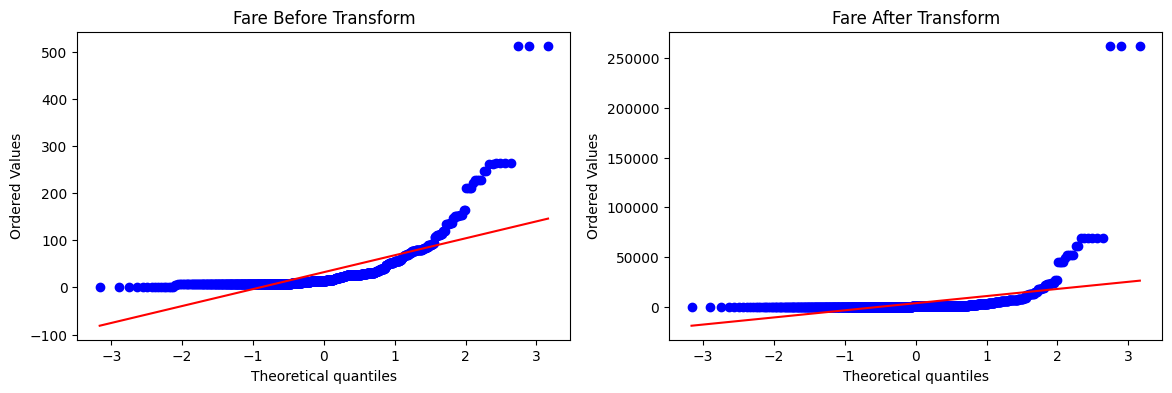

In [271]:
apply_transform(lambda x:(x**2))

In [42]:
from sklearn.preprocessing import PowerTransformer

In [66]:
df=pd.read_csv('/content/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [68]:
cols=df.columns.tolist()

In [69]:
X=df.drop('Strength',axis=1)
y=df.iloc[:,-1]

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


In [49]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [56]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(lr,X,y,cv=kf)

In [57]:
print(f"cross_val_score of model: {np.mean(score)*100}")

cross_val_score of model: 59.101807181441814


In [52]:
lr=LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(lr,X_train,y_train,cv=kf)

In [55]:
print(f"cross_val_score of train model: {np.mean(score)*100}")

cross_val_score of train model: 57.78188302240537


In [58]:
pred_reg=lr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,pred_reg)
print(f"Test score:{score*100}")

Test score:62.7553179231485


In [60]:
print(F'mean_absolute_error:{mean_absolute_error(y_test,pred_reg)}')
print(F'mean_squared_error:{mean_squared_error(y_test,pred_reg)}')
print(F'root_mean_squared_error:{np.sqrt(mean_squared_error(y_test,pred_reg))}')

mean_absolute_error:7.745559243921434
mean_squared_error:95.97094009110683
root_mean_squared_error:9.79647590162436


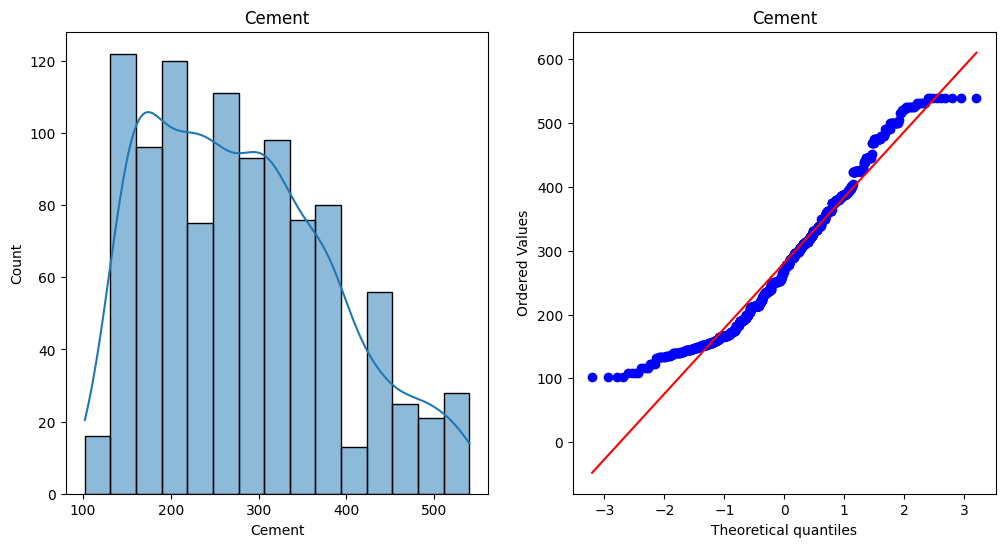

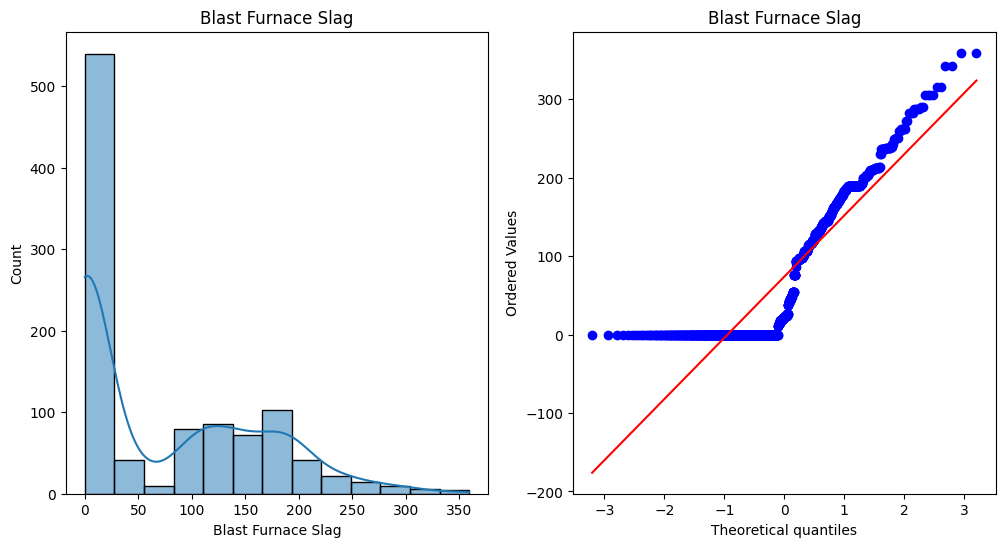

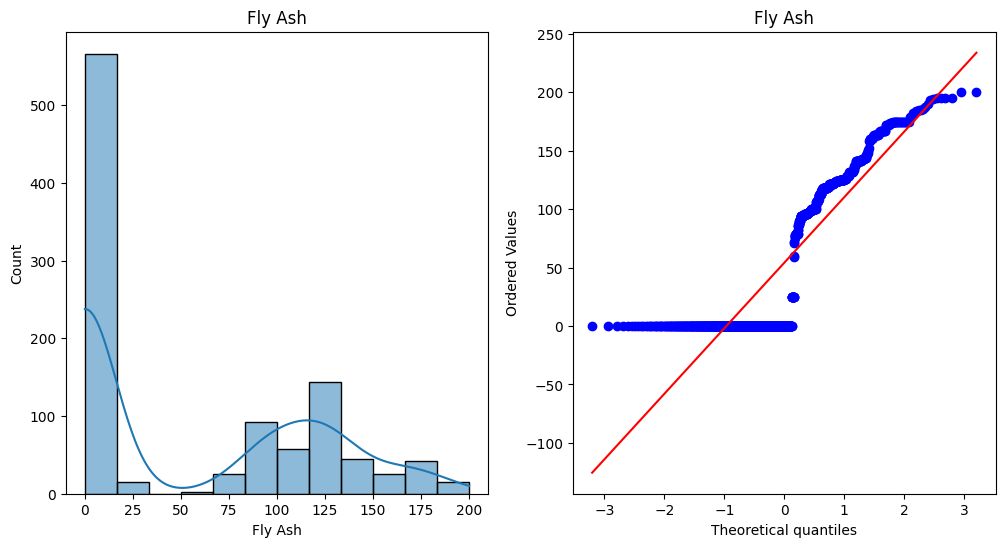

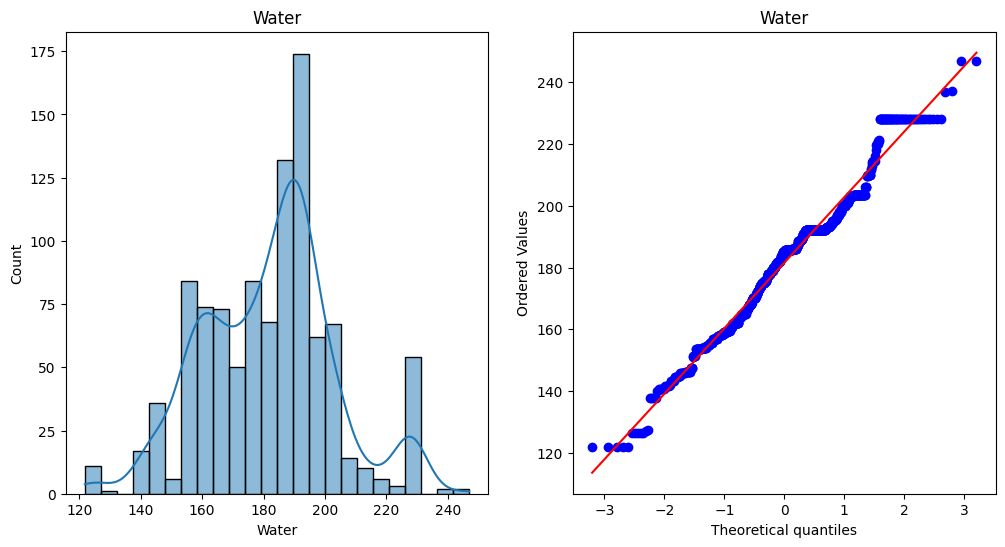

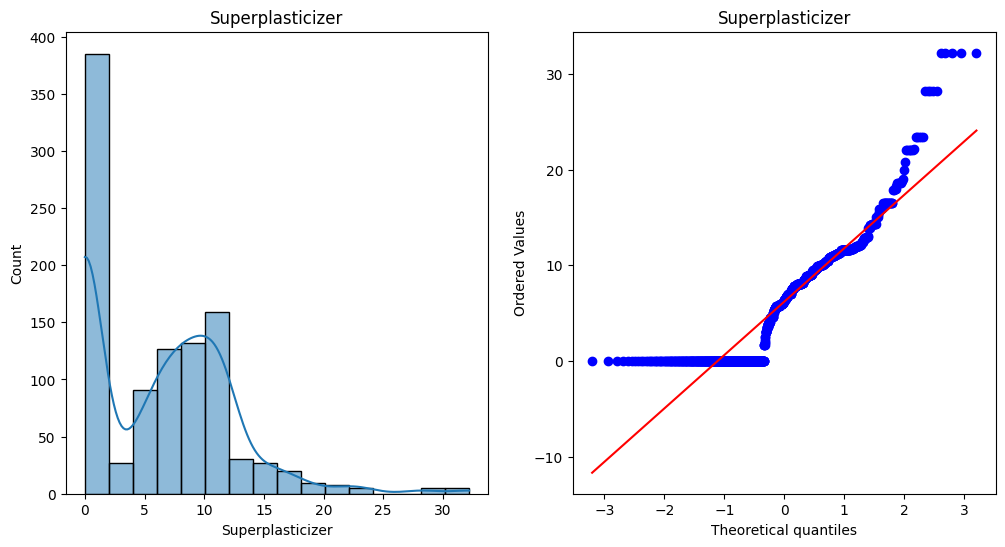

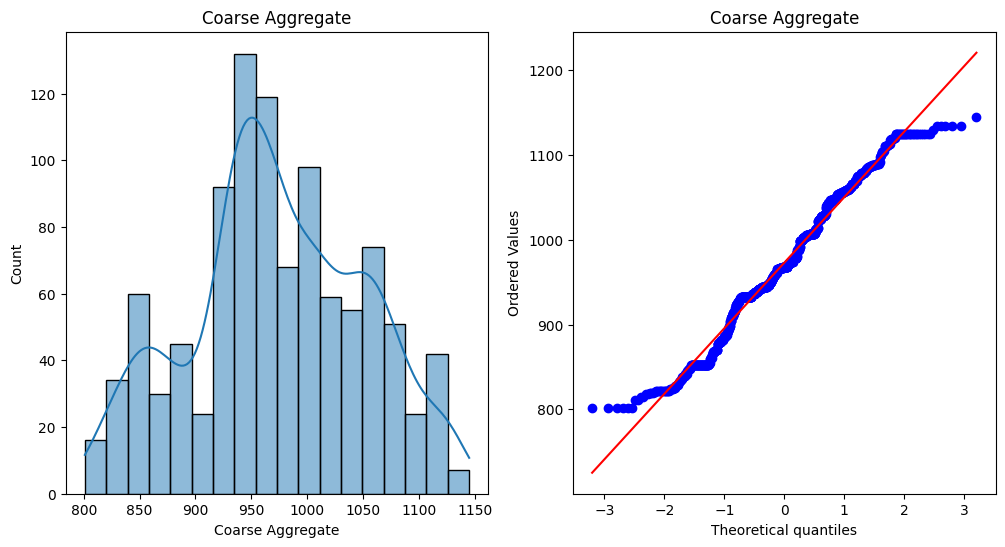

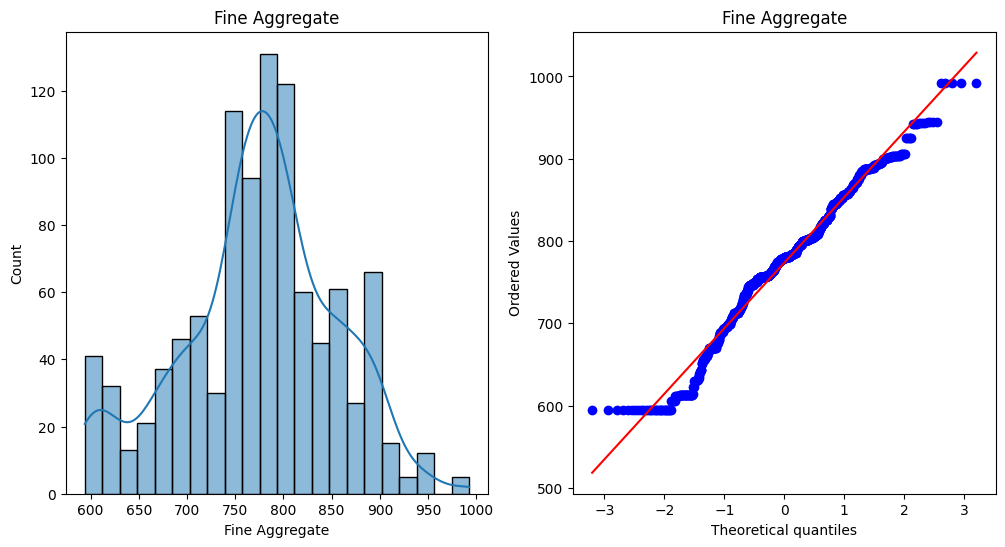

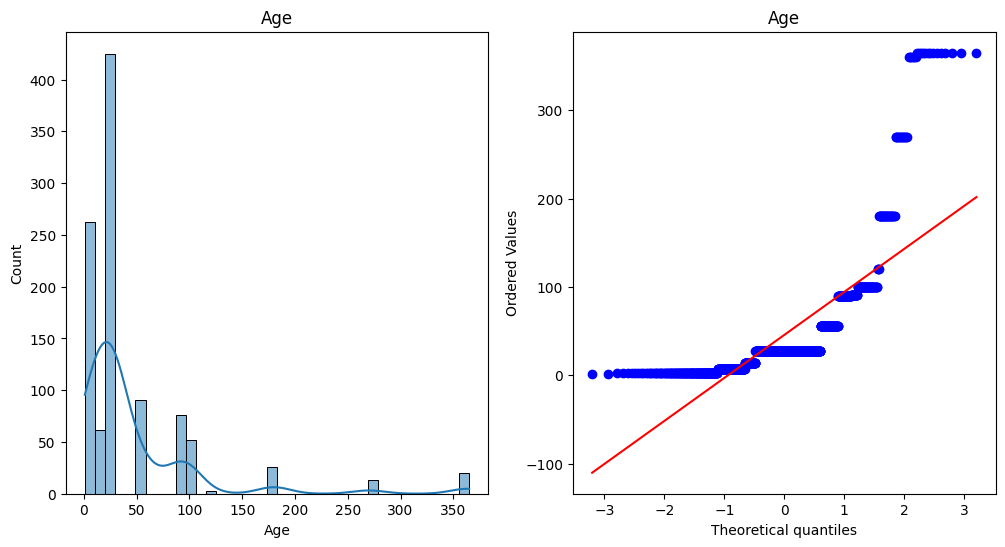

In [62]:
for col in cols[:-1]:
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  sns.histplot(df,x=col,kde=True)
  plt.title(col)
  plt.subplot(122)
  stats.probplot(df[col],dist='norm',plot=plt)
  plt.title(col)
  plt.show()

#`Applying Power transformation`

In [71]:
yt=PowerTransformer('box-cox')
X_train_trans=yt.fit_transform(X_train+0.01)
X_test_trans=yt.transform(X_test+0.01)

In [72]:
pd.DataFrame({'col':X_train.columns,'box-cox lambda':yt.lambdas_})

,col,box-cox lambda
0,Cement,0.176999
1,Blast Furnace Slag,0.037721
2,Fly Ash,-0.078418
3,Water,0.772668
4,Superplasticizer,0.199909
5,Coarse Aggregate,1.129816
6,Fine Aggregate,1.782029
7,Age,0.066125


In [73]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [84]:
X_trans=yt.fit_transform(X+0.00001)

In [85]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(lr,X_trans,y,cv=kf)

In [86]:
print(F'crorss_validation_Score of model :{np.mean(score)*100}')

crorss_validation_Score:79.31907983977537


In [89]:
kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(lr,X_train_trans,y_train,cv=kf)

In [90]:
print(F'crorss_validation_Score of train:{np.mean(score)*100}')

crorss_validation_Score of train:78.52516540650608


In [80]:
pred_reg=lr.predict(X_test_trans)

In [82]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f"r2_Score:{r2_score(y_test,pred_reg)*100}")

r2_Score:80.9323453426501


In [83]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_reg))
print('Mean Squared Error:',mean_squared_error(y_test, pred_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_reg)))

Mean Absolute Error: 5.599180580423139
Mean Squared Error: 49.1329403489739
Root Mean Squared Error: 7.009489307287222


##`Before and after box-cox transformation`

In [93]:
X_train_trans_df=pd.DataFrame(X_train_trans,columns=X_train.columns)
X_train_trans_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.983915,1.129139,-0.301920,1.042706,-0.262500,-0.677568,0.106017
1,1.244707,0.512105,1.147899,-0.165055,0.718191,-1.912728,-0.314062,0.106017
2,0.079841,-1.077697,1.135767,-1.047291,0.801705,1.018407,0.025957,-1.675873
3,-0.145642,0.875184,1.066399,0.581224,0.685688,-1.750779,0.583253,0.106017
4,-1.131045,0.668994,1.139196,-1.105297,0.850523,1.368575,0.262623,-1.675873
...,...,...,...,...,...,...,...,...
819,0.183600,1.060961,-0.886742,-1.769924,0.871181,0.390563,0.358776,-1.675873
820,-0.198735,-1.077697,1.140127,-1.839129,0.910788,1.445974,0.322797,-0.475795
821,-0.844519,-1.077697,1.140243,-0.706089,0.801705,1.345367,0.297157,1.246851
822,1.565625,0.926399,-0.886742,-0.019311,0.743110,-1.537255,0.076211,0.106017


In [109]:
import warnings
warnings.filterwarnings('ignore')

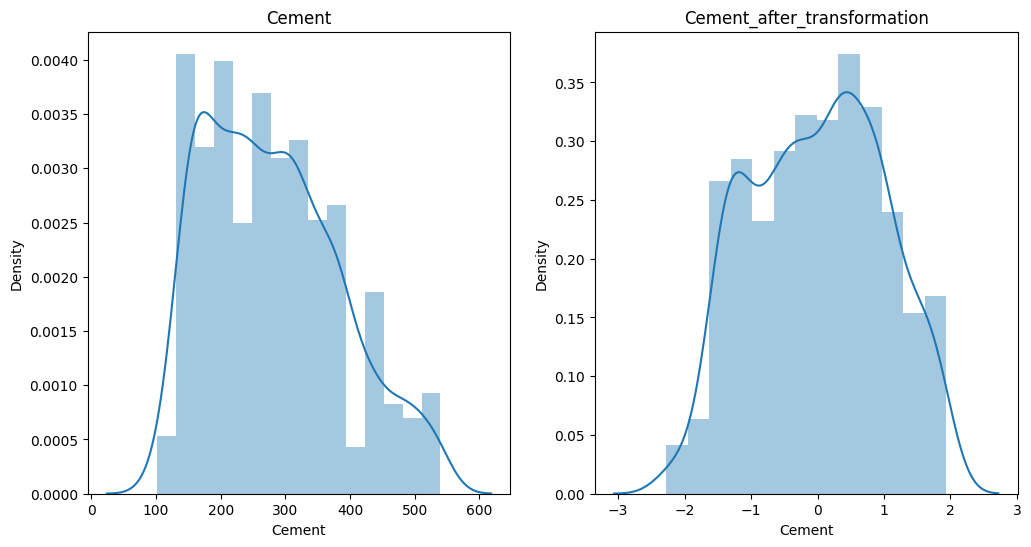

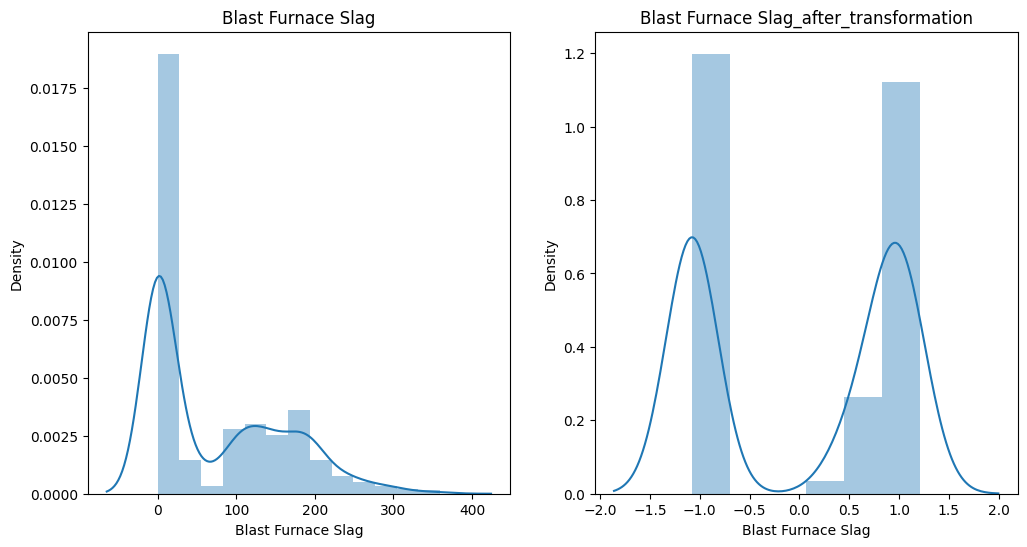

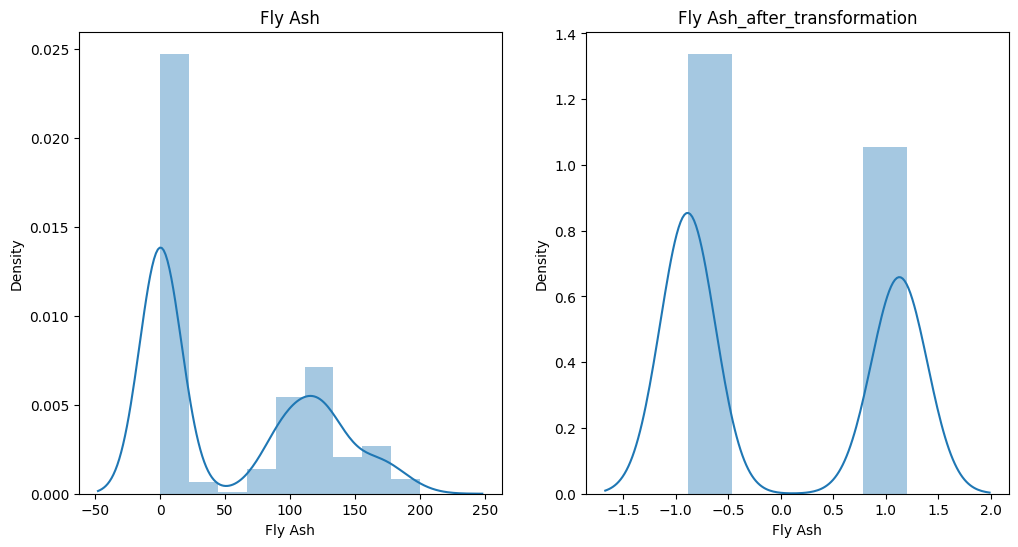

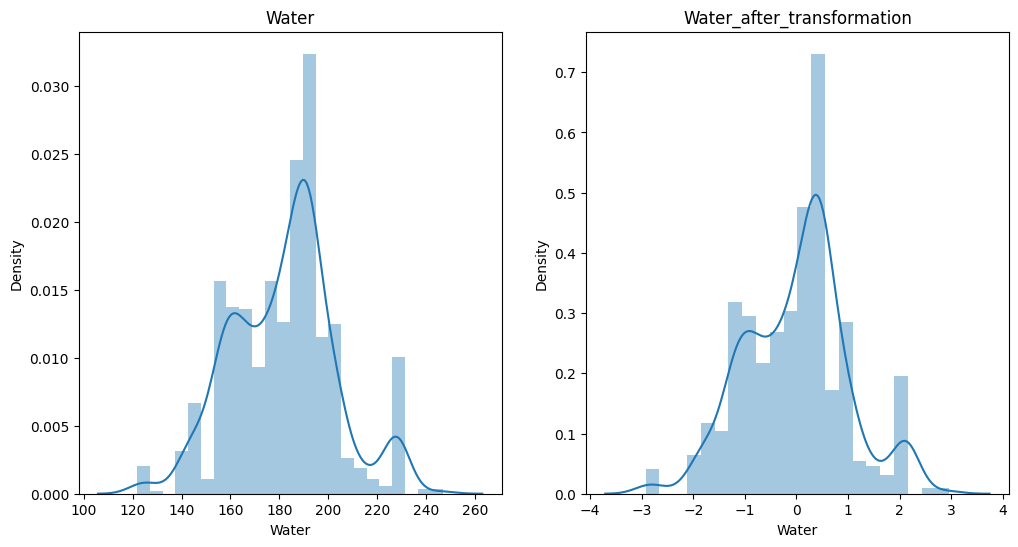

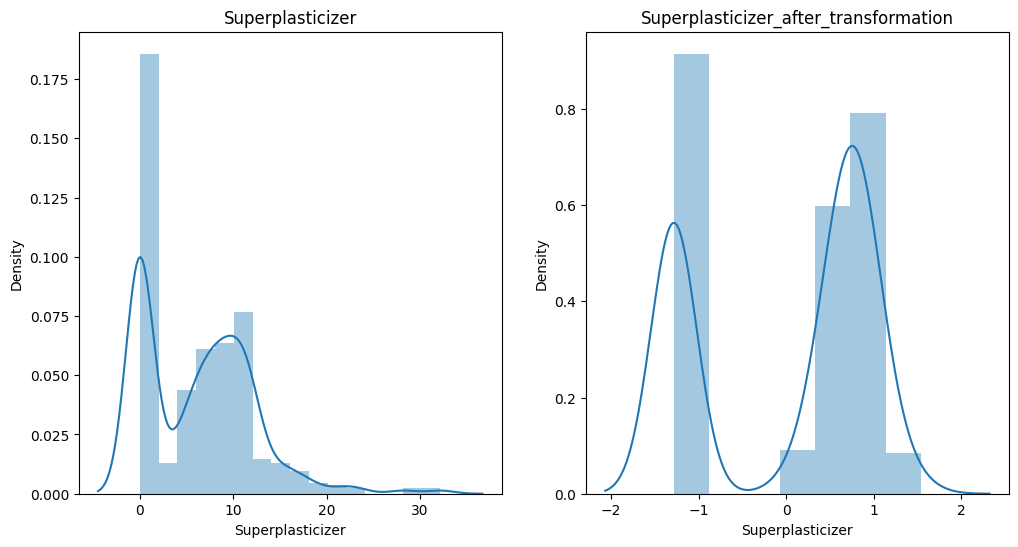

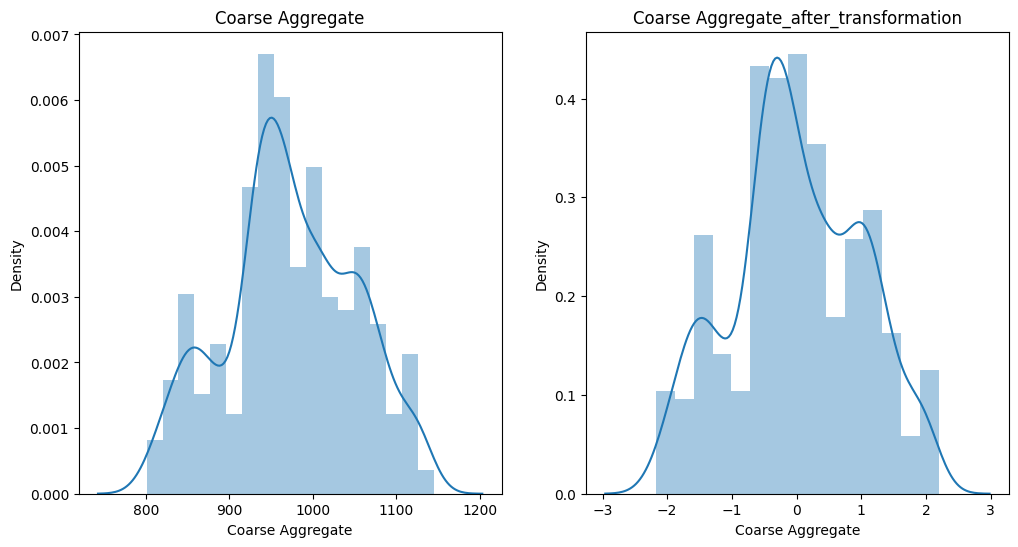

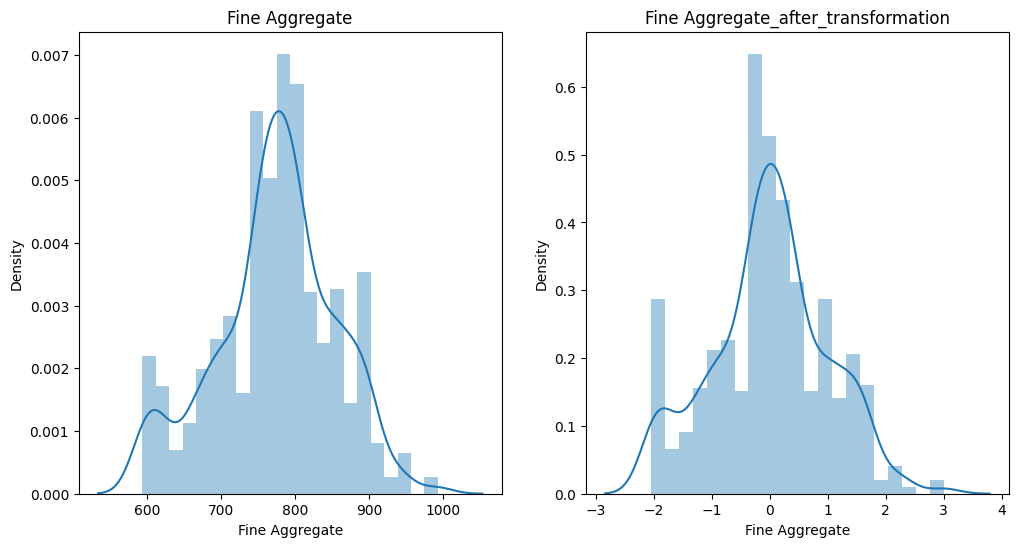

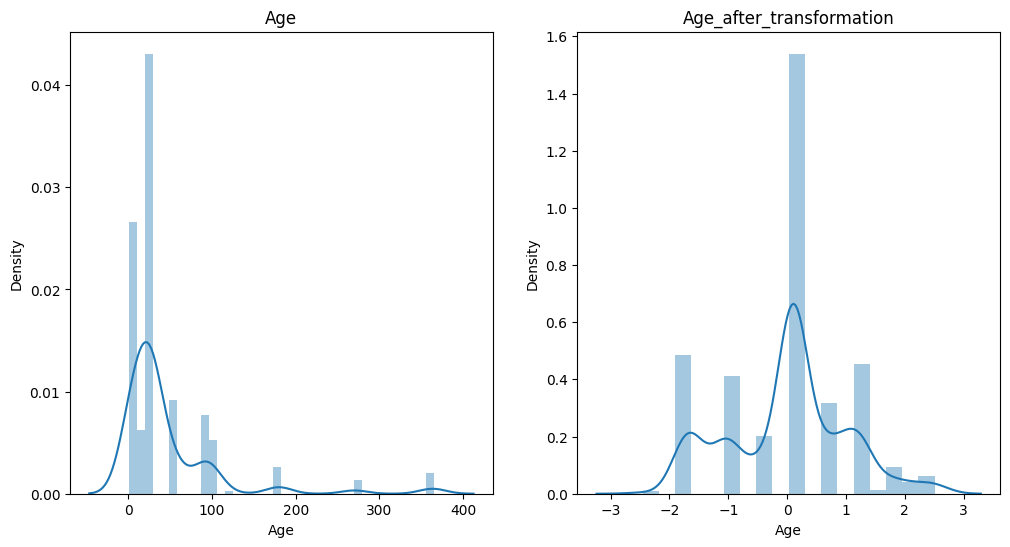

In [110]:
for col in X_train_trans_df.columns:
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  sns.distplot(df[col])
  plt.title(col)
  plt.subplot(122)
  sns.distplot(X_train_trans_df[col])
  plt.title(col +'_after_transformation')
  plt.show()

In [112]:
X_train['Age'].skew()

3.335411210082252

In [113]:
X_train_trans_df['Age'].skew()

-0.007336019508833832

##`yeo-johanson`

In [115]:
yt=PowerTransformer('yeo-johnson')
X_train_trans=yt.fit_transform(X_train+0.01)
X_test_trans=yt.transform(X_test+0.01)

pd.DataFrame({'col':X_train.columns,'box-cox lambda':yt.lambdas_})

lr=LinearRegression()
lr.fit(X_train_trans,y_train)

X_trans=yt.fit_transform(X+0.00001)

kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(lr,X_trans,y,cv=kf)

print(F'crorss_validation_Score of model :{np.mean(score)*100}')

kf=KFold(n_splits=25,shuffle=True,random_state=42)
score=cross_val_score(lr,X_train_trans,y_train,cv=kf)

print(F'crorss_validation_Score of train:{np.mean(score)*100}')

pred_reg=lr.predict(X_test_trans)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f"r2_Score:{r2_score(y_test,pred_reg)*100}")

print('Mean Absolute Error:',mean_absolute_error(y_test, pred_reg))
print('Mean Squared Error:',mean_squared_error(y_test, pred_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_reg)))

crorss_validation_Score of model :79.68096370218235
crorss_validation_Score of train:78.71707597792859
r2_Score:81.62146186927654
Mean Absolute Error: 5.553329995698417
Mean Squared Error: 47.357246284618746
Root Mean Squared Error: 6.881660140156497


In [116]:
X_train_trans_df=pd.DataFrame(X_train_trans,columns=X_train.columns)
X_train_trans_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018273,1.130999,-0.301917,1.250976,-0.262504,-0.677567,0.105769
1,1.244814,0.221577,1.166743,-0.165051,0.643687,-1.912717,-0.314063,0.105769
2,0.079751,-1.056839,1.143667,-1.047299,0.796107,1.018407,0.025954,-1.664864
3,-0.145771,0.835581,1.009037,0.581232,0.585186,-1.750770,0.583249,0.105769
4,-1.131112,0.486875,1.150204,-1.105305,0.886525,1.368579,0.262619,-1.664864
...,...,...,...,...,...,...,...,...
819,0.183529,1.147010,-0.884922,-1.769937,0.925066,0.390560,0.358772,-1.664864
820,-0.198871,-1.056839,1.151977,-1.839143,0.999404,1.445978,0.322793,-0.491405
821,-0.844662,-1.056839,1.152197,-0.706091,0.796107,1.345370,0.297153,1.257611
822,1.565742,0.921771,-0.884922,-0.019305,0.688857,-1.537249,0.076208,0.105769


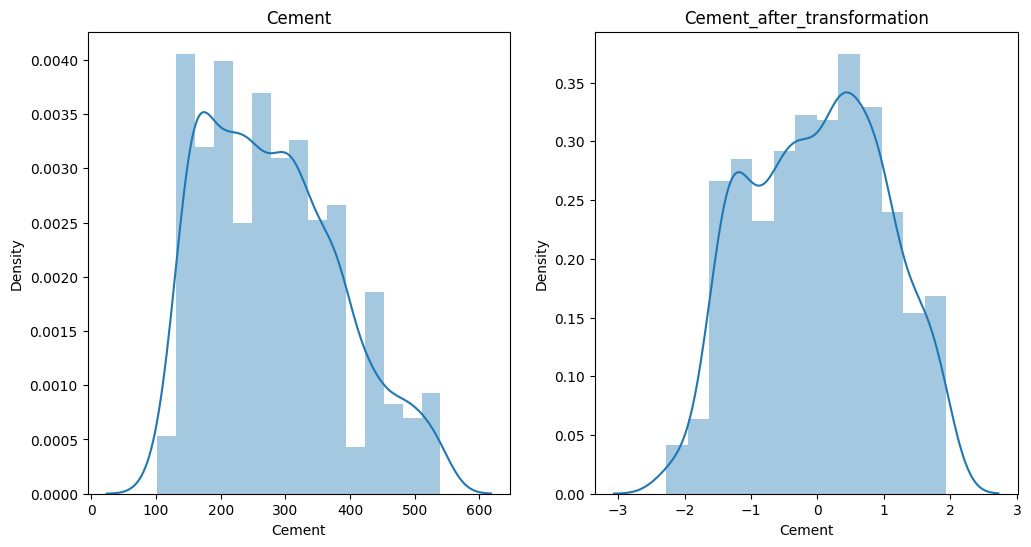

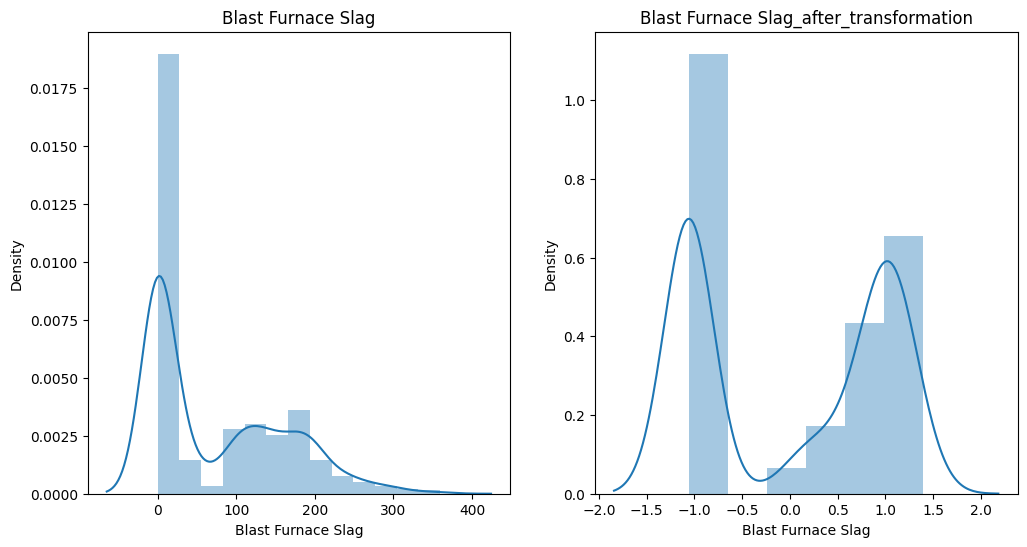

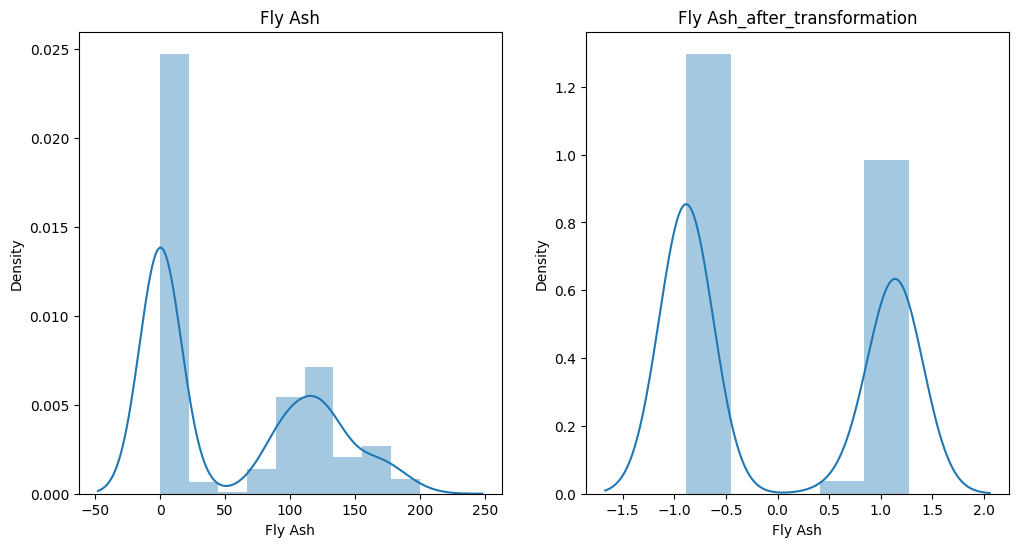

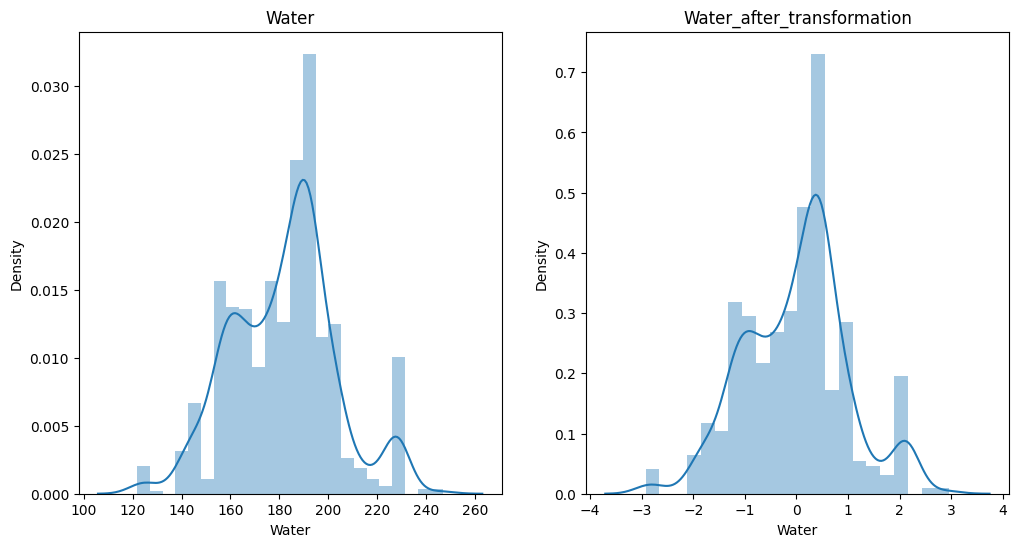

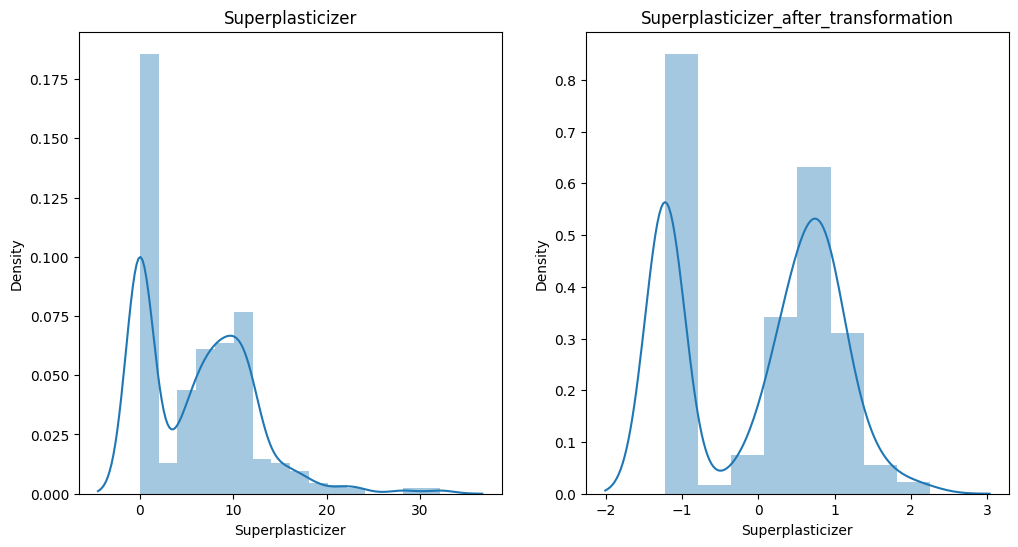

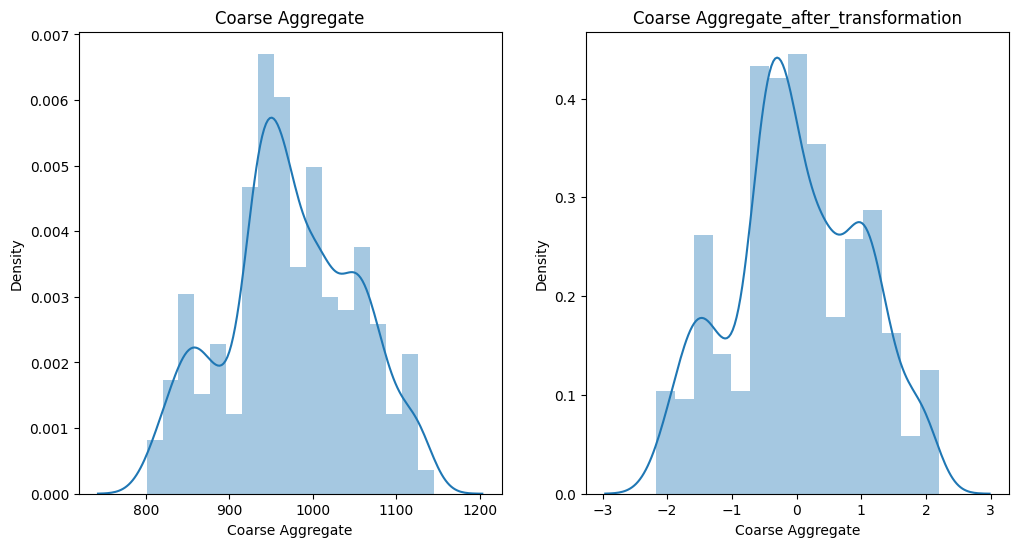

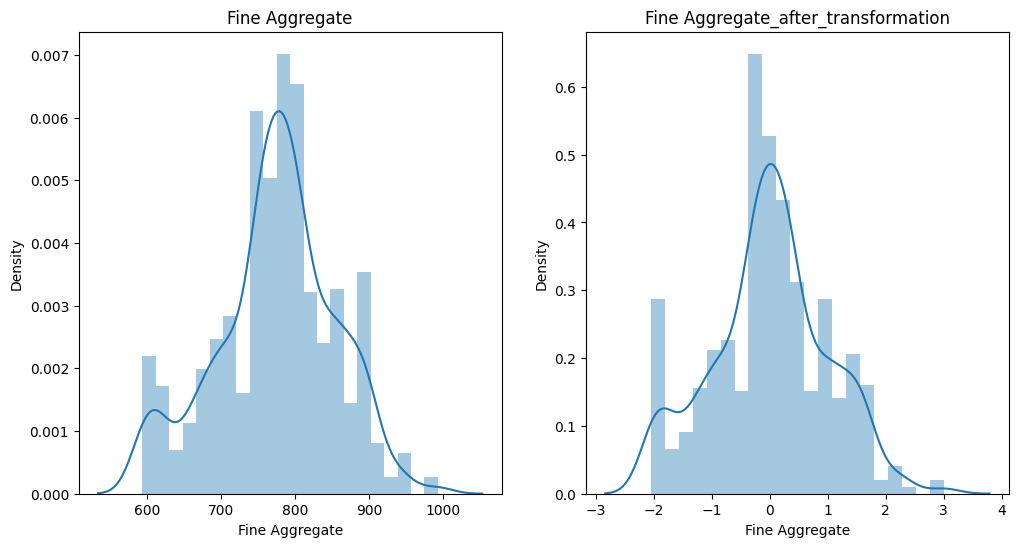

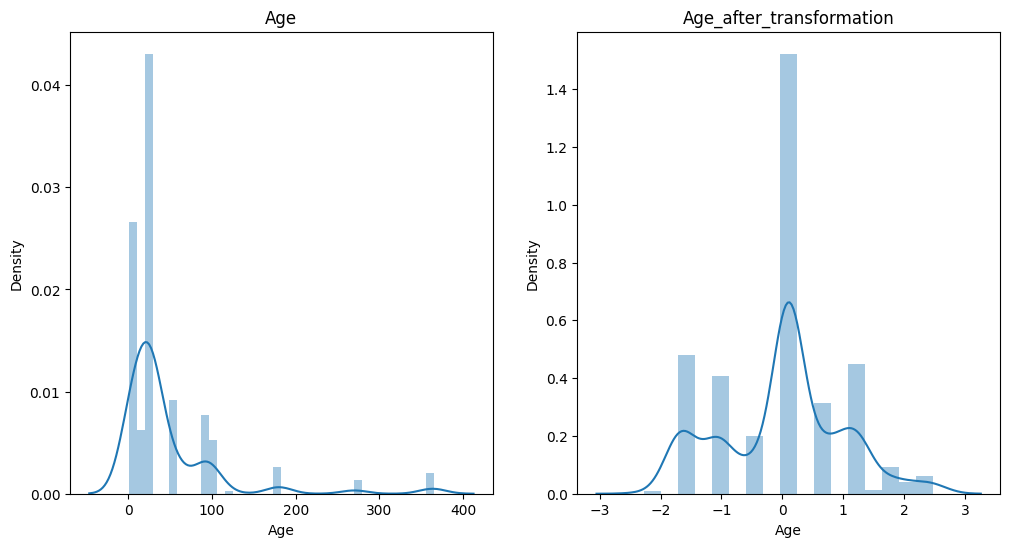

In [117]:
for col in X_train_trans_df.columns:
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  sns.distplot(df[col])
  plt.title(col)
  plt.subplot(122)
  sns.distplot(X_train_trans_df[col])
  plt.title(col +'_after_transformation')
  plt.show()

In [ ]:
# The Yeo-Johnson transformation significantly improved the performance of the linear regression model on the cement dataset